# Scikit-Learn

https://scikit-learn.org/stable/tutorial/basic/tutorial.html
<br>
https://www.codecademy.com/articles/scikit-learn

***

Scikit-Learn is an Open Source ML library for Python. It is built on Matplotlib, NumPy and SciPy. It is a library for Python, that gives many learning algorithms.

<br>

## Types of Algorithms

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

***

### Supervised

https://en.wikipedia.org/wiki/Supervised_learning

***

Supervised Learning is a task where we learn of a function that maps an input to an output based on the input-output pairs. A function is infered from labeled training data consist of a set of examples. Each example is a pair which consists of input objects and the desired output values.

<br>

### Unsupervised

https://en.wikipedia.org/wiki/Unsupervised_learning

***

In unsupervised learning the algorithm is not provided with any pre-assigned labels or scores. With this in mind the unsupervised algorithms have to first discover any naturally occuring patterns in the data set.

<br>

# Scikit-Learn - Tutorial Examples

https://scikit-learn.org/stable/tutorial/basic/tutorial.html
***

In [37]:
# Imports Datasets
import sklearn.datasets as datasets

In [2]:
# 
iris = datasets.load_iris()

In [3]:
digits = datasets.load_digits()

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
import sklearn.svm as svm

In [8]:
clf = svm.SVC(gamma=0.001, C=100.)

In [9]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [10]:
clf.predict(digits.data[-3:])

array([8, 9, 8])

# Scikit-Learn - Wine Quality Classification

![image.png](https://cdn11.bigcommerce.com/s-ivmnj8k4ja/images/stencil/789x789/uploaded_images/redwhite.jpg?t=1536084174)

Image from: https://beclink.com/

***

## Setup

In [11]:
# Imports

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [12]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

## The Wine Quality Dataset

In [13]:
# Load the Wine Quality data set from a URL.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white",sep=";")

In [14]:
# Have a look at the data.
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [15]:
# Summary statistics.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Visualise

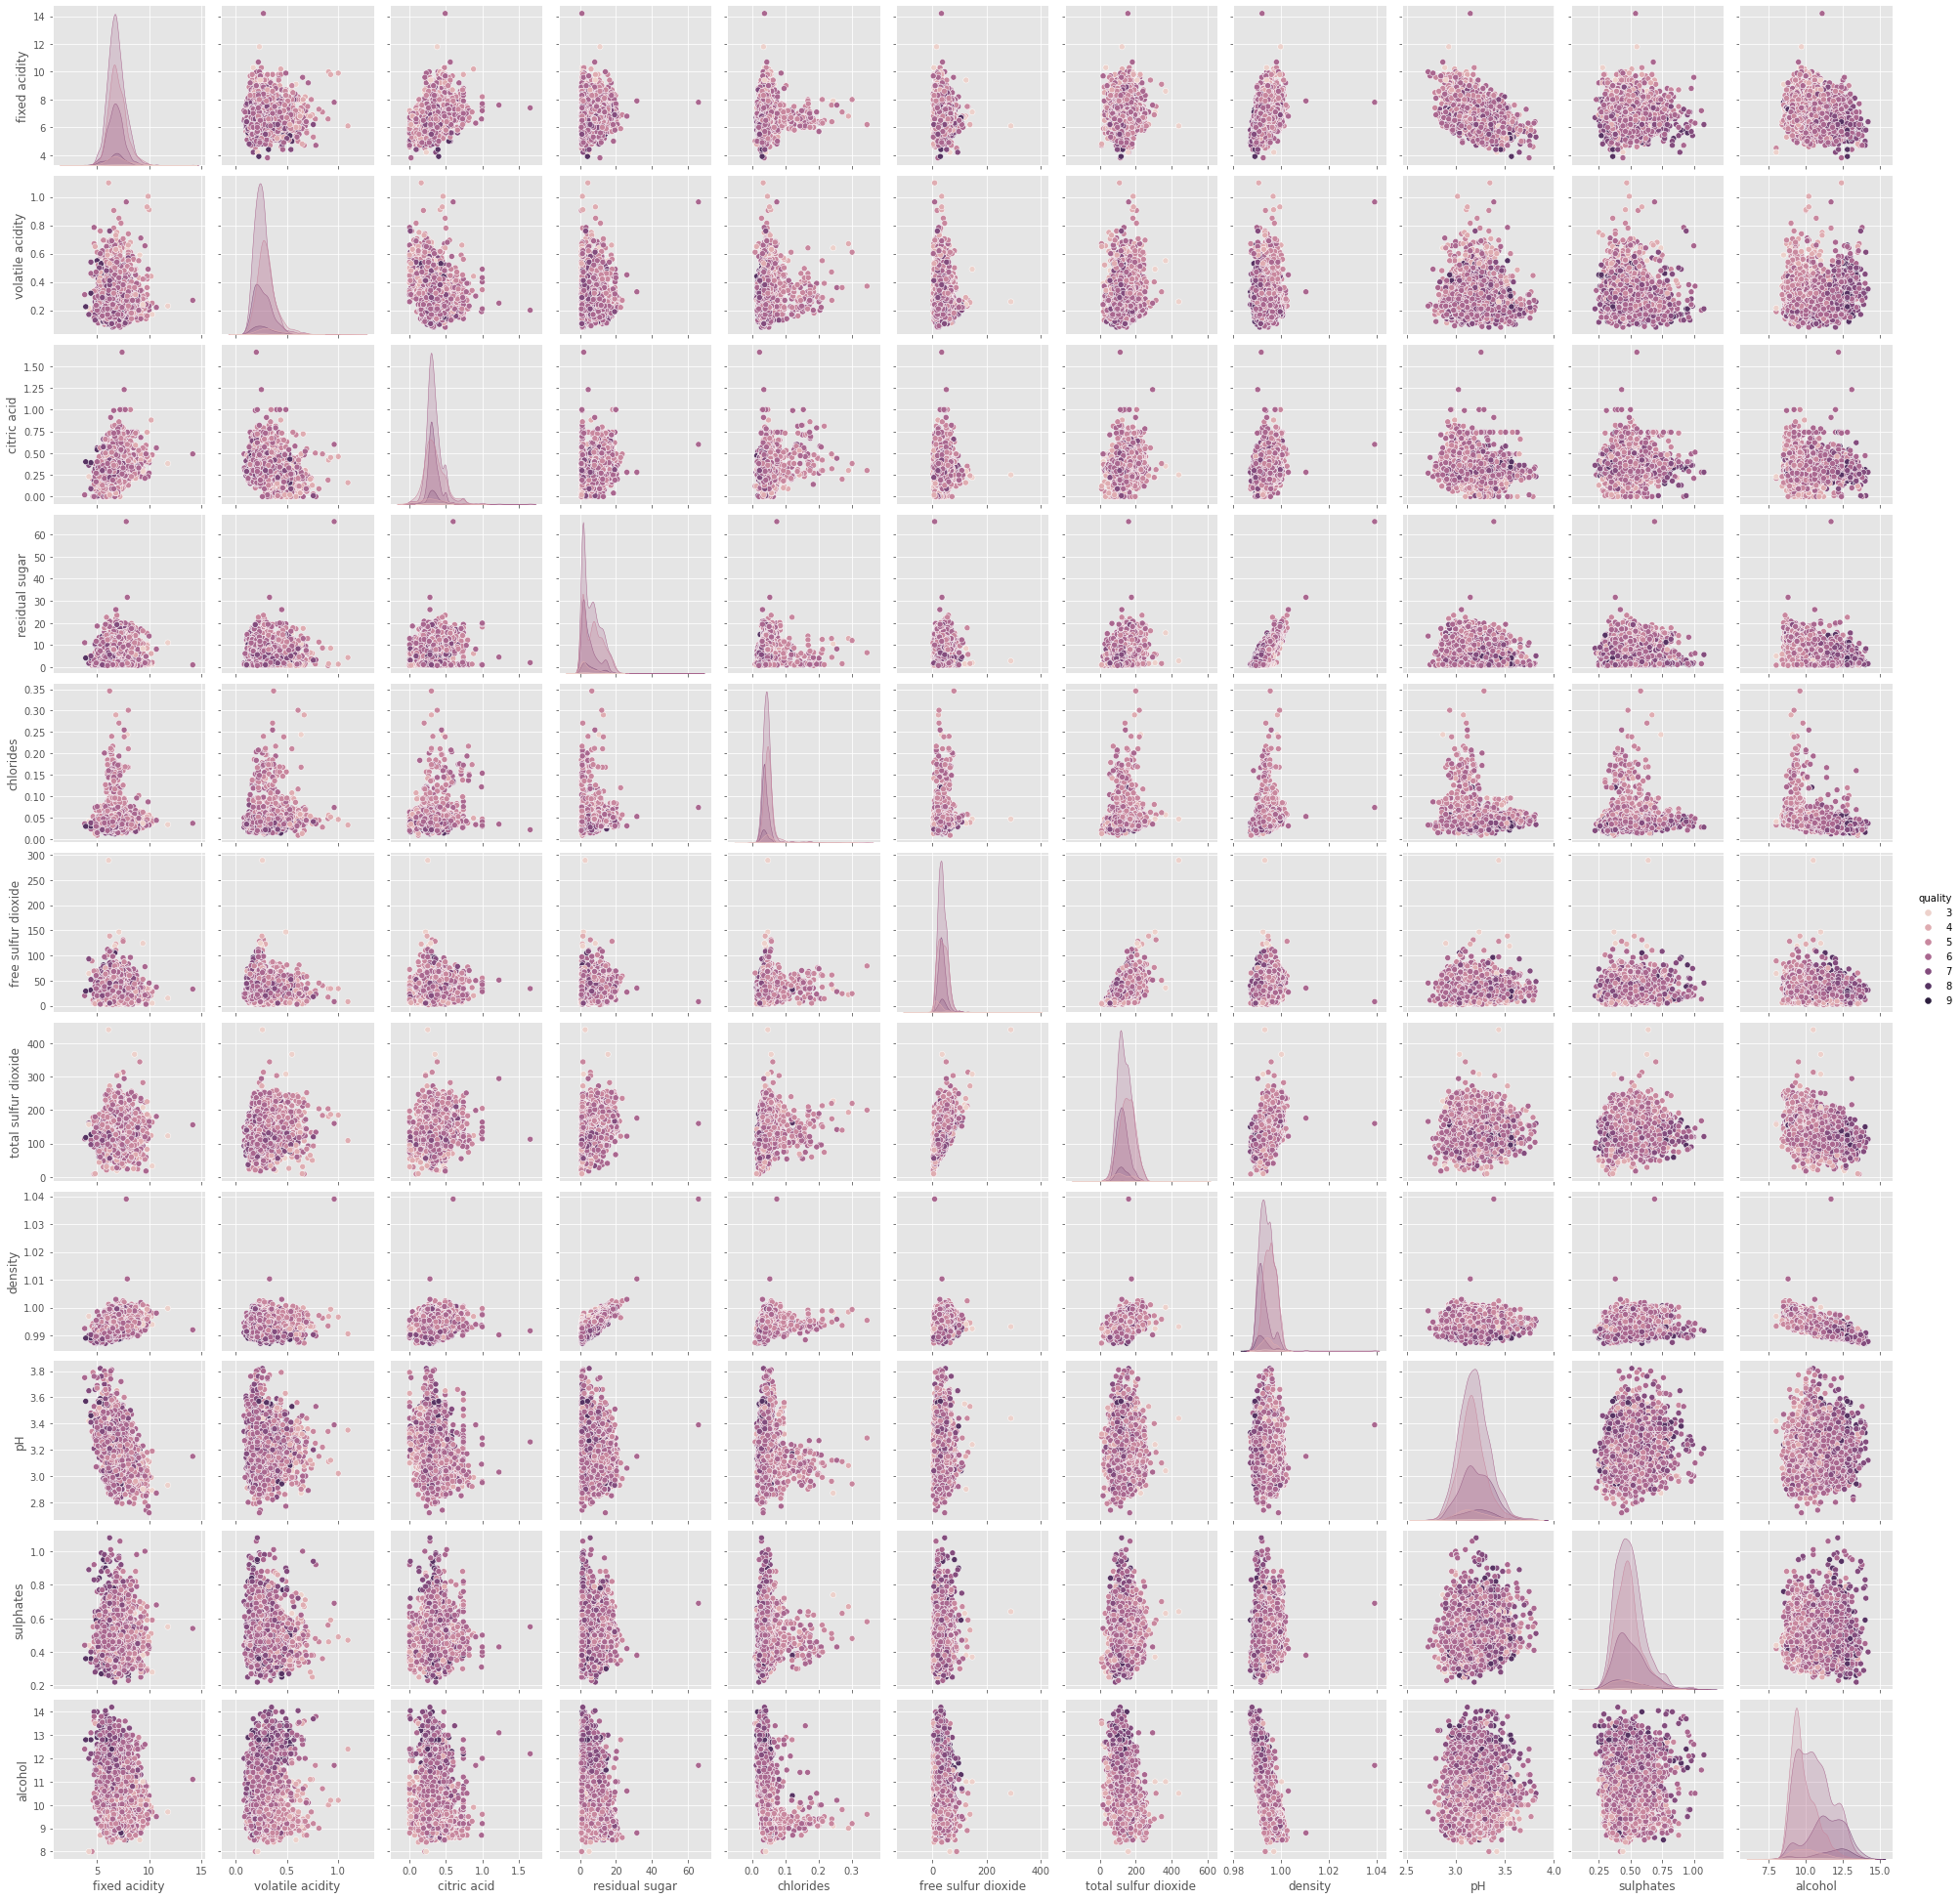

In [16]:
# Scatter plots and kdes.
sns.pairplot(df, hue='quality');

## Two Dimensions

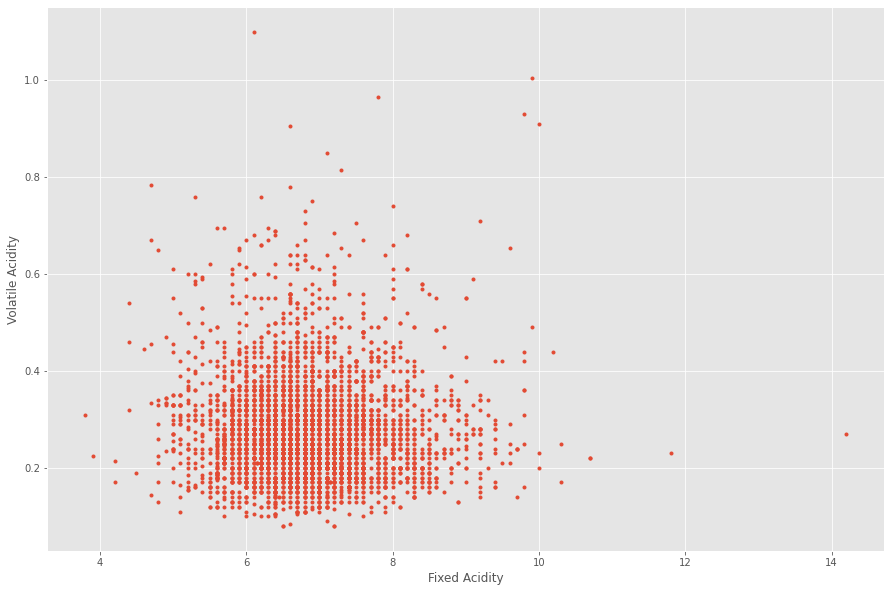

In [17]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['fixed acidity'], df['volatile acidity'], '.')

# Set axis labels.
ax.set_xlabel('Fixed Acidity');
ax.set_ylabel('Volatile Acidity');

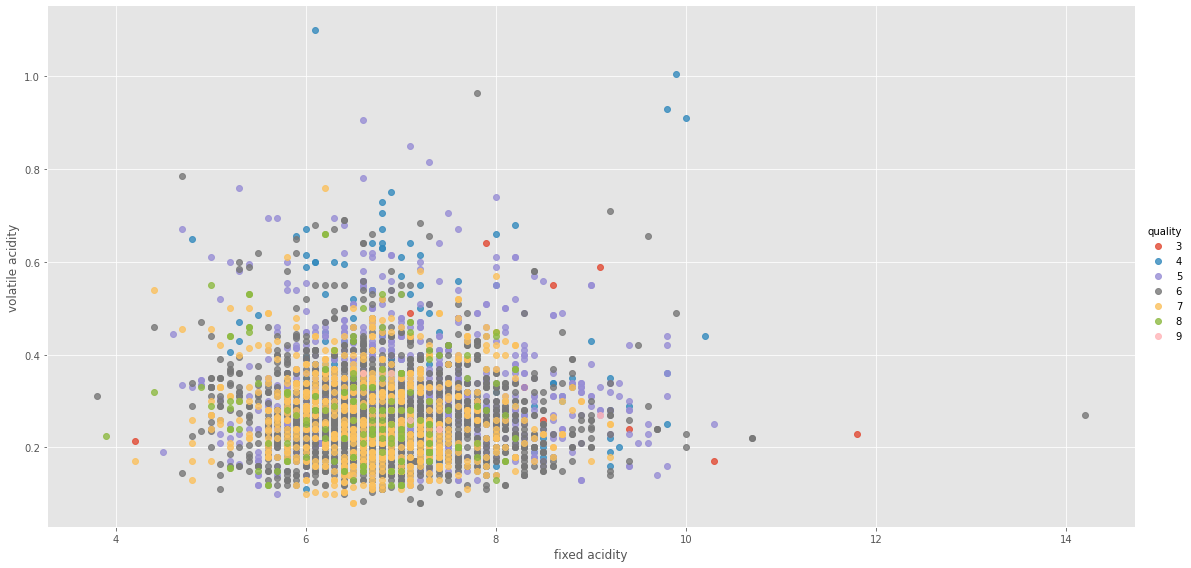

In [18]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="fixed acidity", y="volatile acidity", hue='quality', data=df, fit_reg=False, height=8, aspect=2);

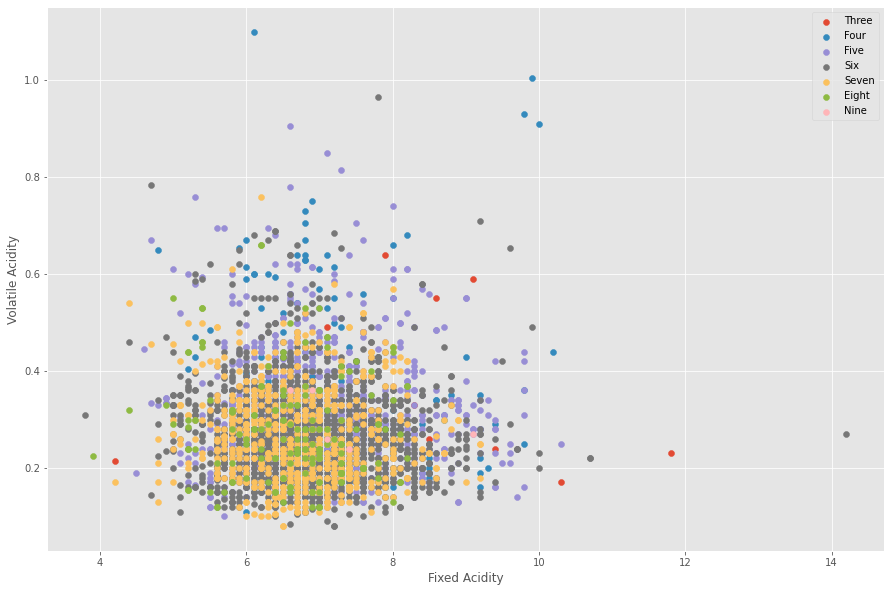

In [19]:
# Segregate the data.
three = df[df['quality'] == 3]
four = df[df['quality'] == 4]
five = df[df['quality'] == 5]
six = df[df['quality'] == 6]
seven = df[df['quality'] == 7]
eight = df[df['quality'] == 8]
nine = df[df['quality'] == 9]

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(three['fixed acidity'], three['volatile acidity'], label='Three')
ax.scatter(four['fixed acidity'], four['volatile acidity'], label='Four')
ax.scatter(five['fixed acidity'], five['volatile acidity'], label='Five')
ax.scatter(six['fixed acidity'], six['volatile acidity'], label='Six')
ax.scatter(seven['fixed acidity'], seven['volatile acidity'], label='Seven')
ax.scatter(eight['fixed acidity'], eight['volatile acidity'], label='Eight')
ax.scatter(nine['fixed acidity'], nine['volatile acidity'], label='Nine')

# Show the legend.
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.legend();

In [20]:
# How the segregation works.
#df['quality'] == 'virginica'

In [21]:
#df[df['quality'] == 'virginica'].head()

## Using groupby()

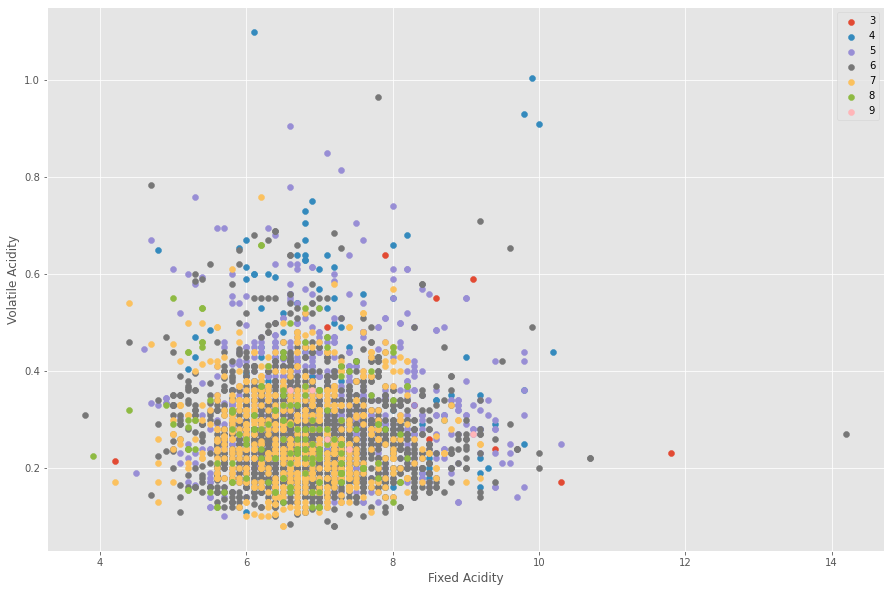

In [22]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for species, data in df.groupby('quality'):
    ax.scatter(data['fixed acidity'], data['volatile acidity'], label=species)

# Show the legend.
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.legend();

In [23]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [24]:
# Pivot tables.
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [25]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '3'
j looks like:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
251            8.5              0.26         0.21            16.2      0.074   
253            5.8              0.24         0.44             3.5      0.029   
294            9.1              0.59         0.38             1.6      0.066   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
251                 41.0                 197.0   0.9980  3.02       0.50   
253                  5.0                 109.0   0.9913  3.53       0.43   
294                 34.0                 182.0   0.9968  3.23       0.38   

     alcohol  quality  
251      9.8        3  
253     11.7        3  
294      8.5        3  


i is: '4'
j looks like:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
46             6.2             0.450         0.26             4.4      0.063   
98             9.8             0.360         0.46            10.5  

In [26]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [27]:
# Show some training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3589,6.8,0.190,0.71,17.50,0.042,21.0,114.0,0.99784,2.85,0.50,9.5,6
3645,5.9,0.180,0.28,5.10,0.039,50.0,139.0,0.99165,3.16,0.44,11.3,6
562,7.7,0.340,0.27,8.80,0.063,39.0,184.0,0.99690,3.09,0.63,9.2,6
2206,8.9,0.240,0.33,15.75,0.035,16.0,132.0,0.99600,3.00,0.37,12.1,6
1666,7.8,0.445,0.56,1.00,0.040,8.0,84.0,0.99380,3.25,0.43,10.8,5


In [28]:
# The indices of the train array.
train.index

Int64Index([3589, 3645,  562, 2206, 1666, 1270, 3198, 1467, 3649, 1163,
            ...
            2255, 1730,  550,  119, 2554, 4387, 4751, 2184,  204,  789],
           dtype='int64', length=3673)

In [29]:
# Show some testing data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2345,8.1,0.24,0.26,11.0,0.043,41.0,211.0,0.99676,3.11,0.49,10.0,6
2689,7.6,0.18,0.28,7.1,0.041,29.0,110.0,0.99652,3.20,0.42,9.2,6
3616,7.7,0.32,0.61,11.8,0.041,66.0,188.0,0.99794,3.00,0.54,9.3,5
1451,7.2,0.40,0.49,1.1,0.048,11.0,138.0,0.99290,3.01,0.42,9.3,5
3383,6.4,0.22,0.32,4.9,0.046,50.0,156.0,0.99316,3.38,0.55,11.2,6


In [30]:
test.index.size

1225

## Two Dimensions: Test Train Split

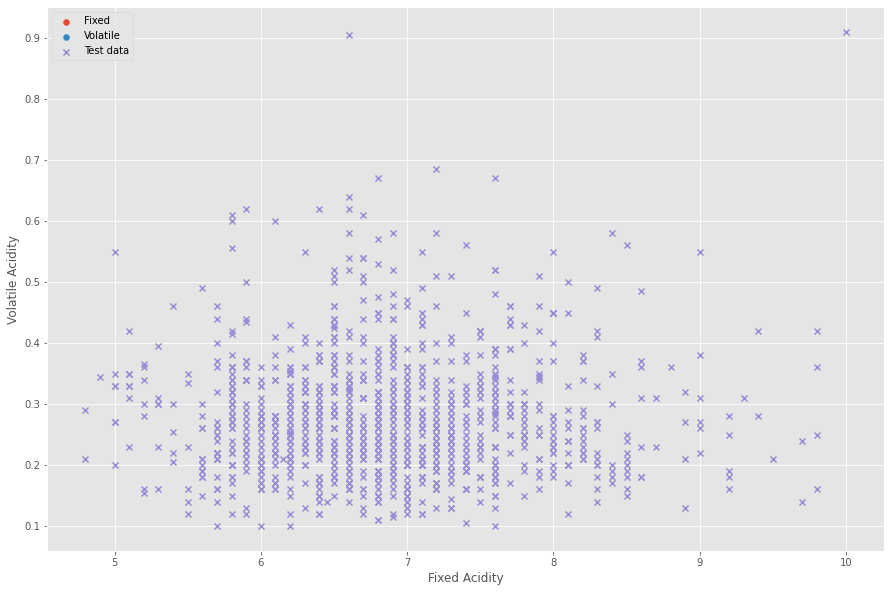

In [31]:
# Segregate the training data.
fixed = train[train['quality'] == 'fixed acidity']
volatile = train[train['quality'] == 'volatile acidity']
#virgi = train[train['quality'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(fixed['fixed acidity'], fixed['volatile acidity'], marker='o', label='Fixed')
ax.scatter(volatile['fixed acidity'], volatile['volatile acidity'], marker='o', label='Volatile')
#ax.scatter(virgi['fixed acidity'], virgi['volatile acidity'], marker='o', label='Virginica')

# Scatter plot for testing data.
ax.scatter(test['fixed acidity'], test['volatile acidity'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.legend();

In [32]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['fixed acidity', 'volatile acidity']], train['quality']

In [33]:
# Peek at the inputs.
inputs.head()

,fixed acidity,volatile acidity
3589,6.8,0.190
3645,5.9,0.180
562,7.7,0.340
2206,8.9,0.240
1666,7.8,0.445


In [34]:
# Peek at the outputs.
outputs.head()

3589    6
3645    6
562     6
2206    6
1666    5
Name: quality, dtype: int64

<br>

## Two Dimensions: Logistic regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [35]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'petal_width']])
predictions

KeyError: "None of [Index(['sepal_length', 'petal_width'], dtype='object')] are in the [columns]"

In [ ]:
# Eyeball the misclassifications.
predictions == test['species']

In [ ]:
# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], test['species'])

## Two Dimensions: Misclassified

In [ ]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

In [ ]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['species']]
misclass

In [ ]:
# Eyeball the descriptive statistics for the species.
train.groupby('species').mean()

In [ ]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['petal_width'], misclass['sepal_length'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

## Separating Setosa

From [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression):

$$\ell = \log_b \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

***

In [ ]:
# Another look at this plot.
sns.pairplot(df, hue='species');

In [ ]:
# Give the inputs and outputs convenient names.
inputs = train[['sepal_length', 'petal_width']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['species'].apply(lambda x: x if x == 'setosa' else 'other')

# Eyeball outputs
outputs.unique()

In [ ]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

In [ ]:
actual = test['species'].apply(lambda x: x if x == 'setosa' else 'other')

# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], actual)

## Using All Possible Inputs

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [ ]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [ ]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [ ]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

In [ ]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
predictions

In [ ]:
# Eyeball the misclassifications.
(predictions == test['species']).value_counts()

In [ ]:
# What proportion were correct?
lre.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

## k  Nearest Neighbours Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [ ]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [ ]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [ ]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [ ]:
# Fit.
knn.fit(inputs, outputs)

In [ ]:
# Test.
knn.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

In [ ]:
# Predict.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
(predictions == test['species']).value_counts()

In [ ]:
# The score is just the accuracy in this case.
(predictions == test['species']).value_counts(normalize=True)

## Cross validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

In [ ]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

In [ ]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

In [ ]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

</b>

# 

# END